In [9]:
# ! /opt/tiger/jupyter_deploy/venv/bin/pip install --user python-docx  --upgrade --force-reinstall --no-cache-dir -i https://pypi.douban.com/simple

In [13]:
# if 需要保留数据，可直接注释
import os
import os.path
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import shutil
def remove_folder(path):
    if os.path.exists(path):
         shutil.rmtree(path)

grey = pd.read_csv('greyDate.csv')
dates = grey['update_date']
for pth in dates:
    remove_folder(pth)
print "文件夹删除完毕"


def del_files(path):
  for root , dirs, files in os.walk(path):
    for name in files:
      if name.endswith(".png"):
        os.remove(os.path.join(root, name))
        # print ("Delete File: " + os.path.join(root, name))
if __name__ == "__main__":
  path = './'
  del_files(path)
print "plot图删除完毕"


def del_files(path):
  for root , dirs, files in os.walk(path):
    for name in files:
      if name.startswith("grey_"):
        os.remove(os.path.join(root, name))  
        print ("Delete File: " + os.path.join(root, name))
if __name__ == "__main__":
  path = './'
  del_files(path)
print "灰度指标数据删除完毕"
print "数据归零"

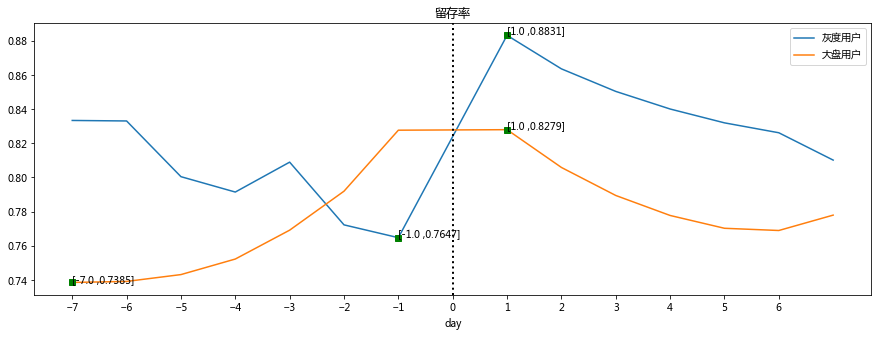

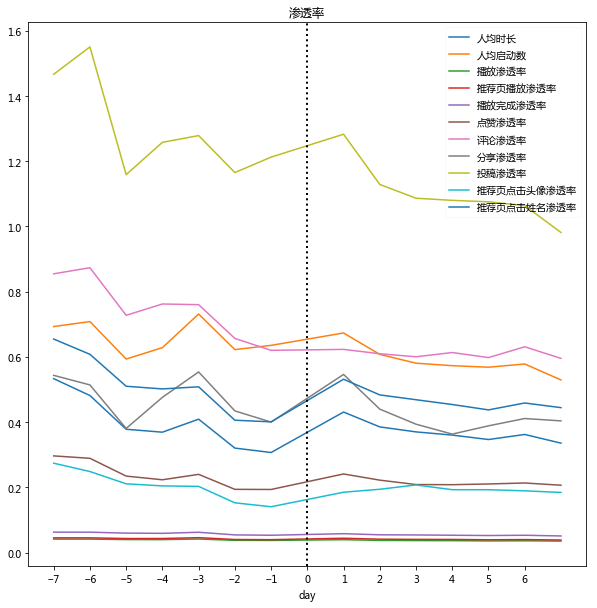

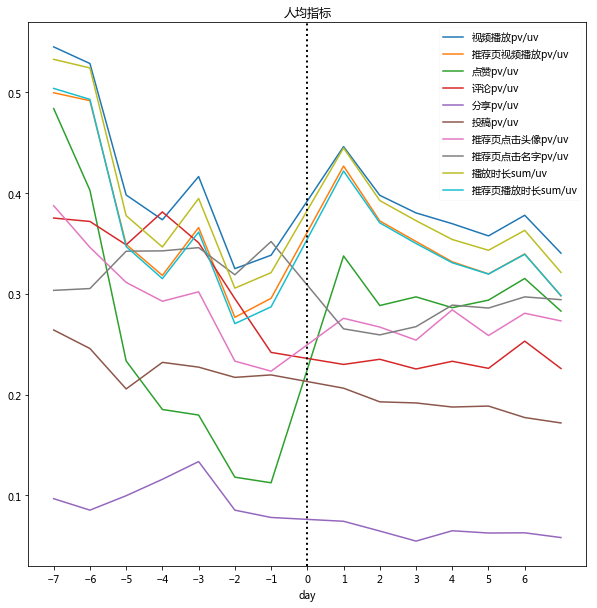

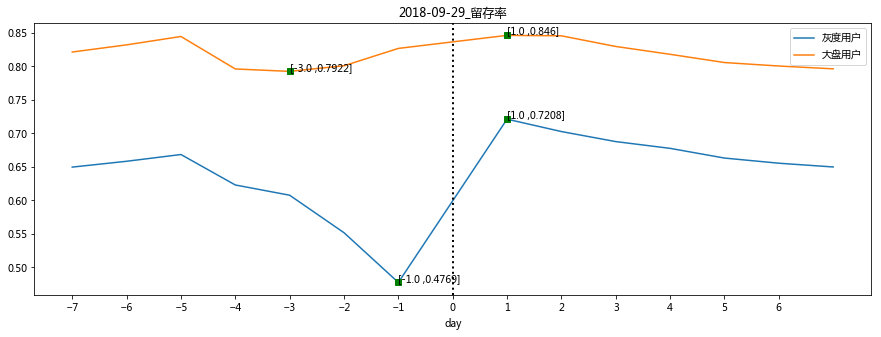

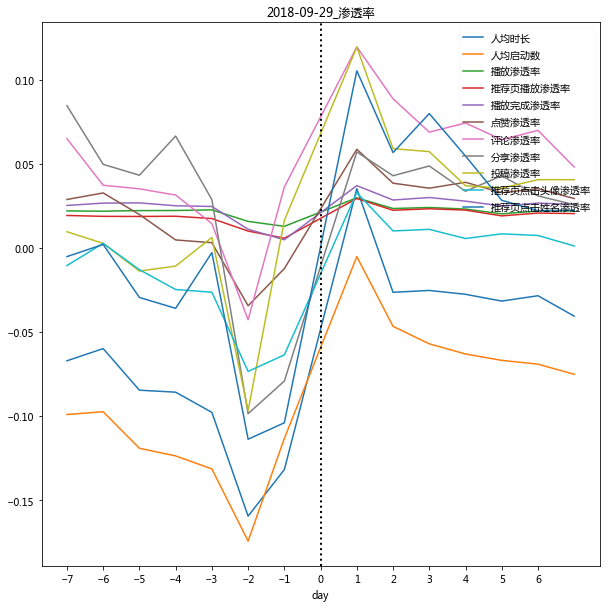

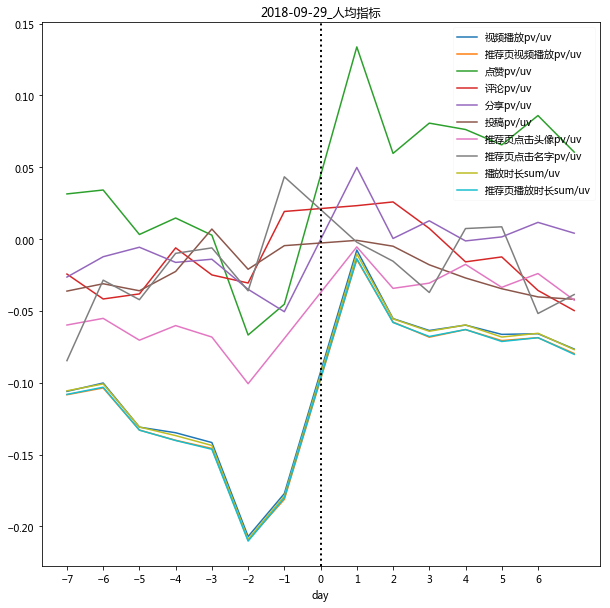

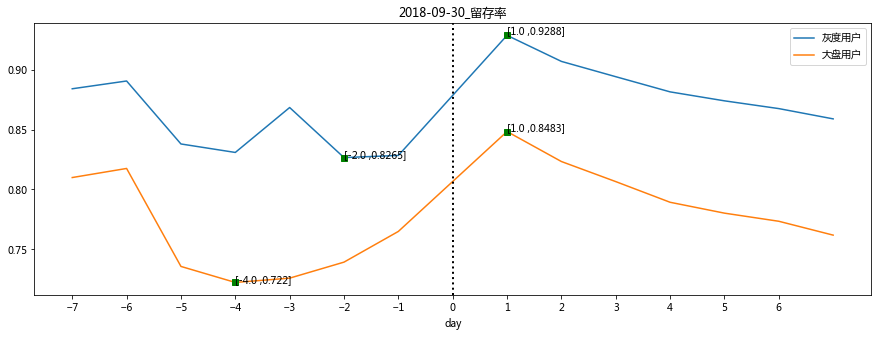

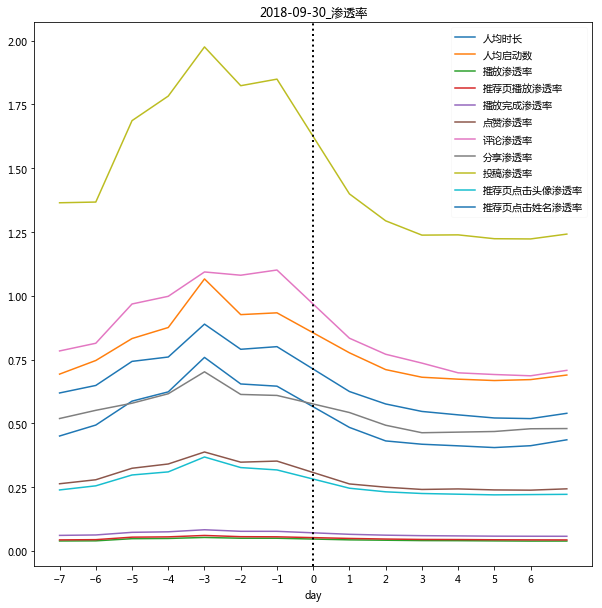

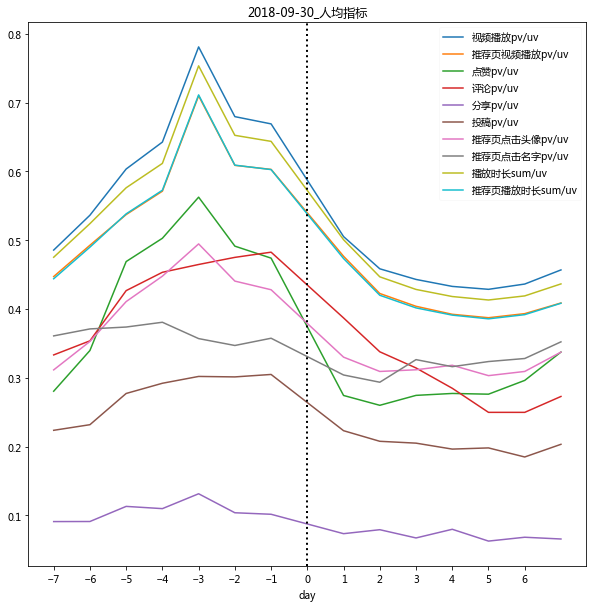

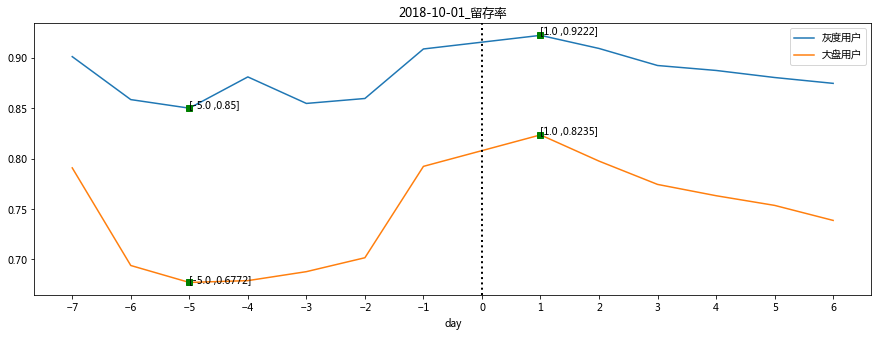

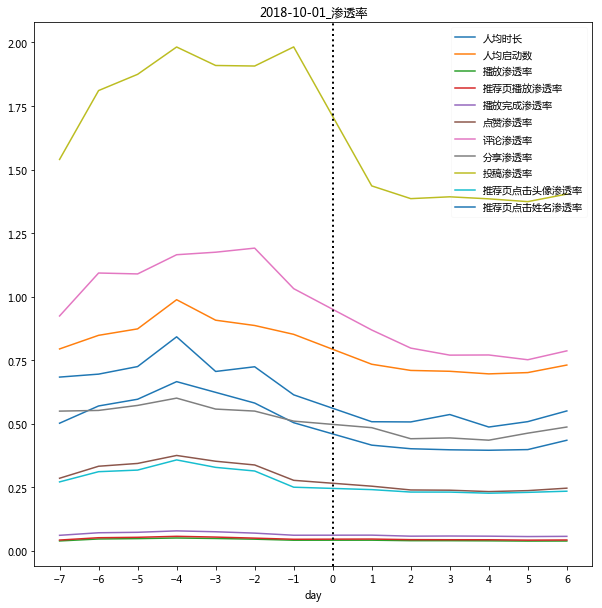

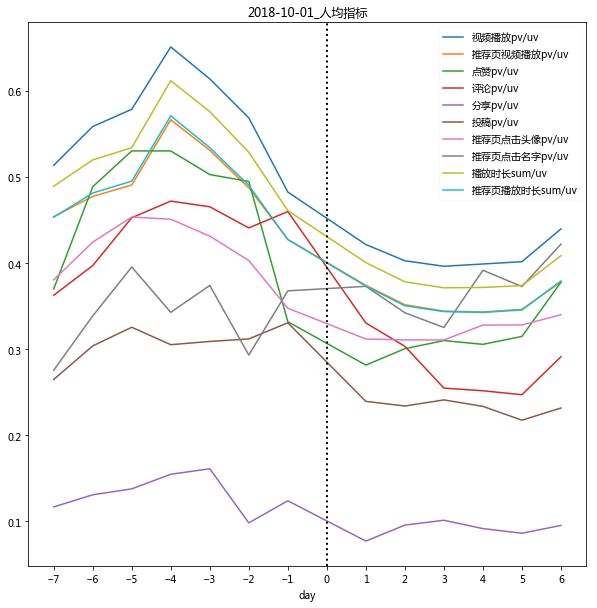

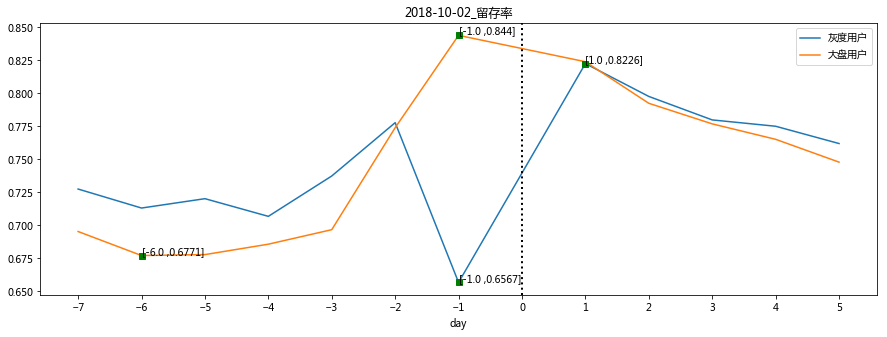

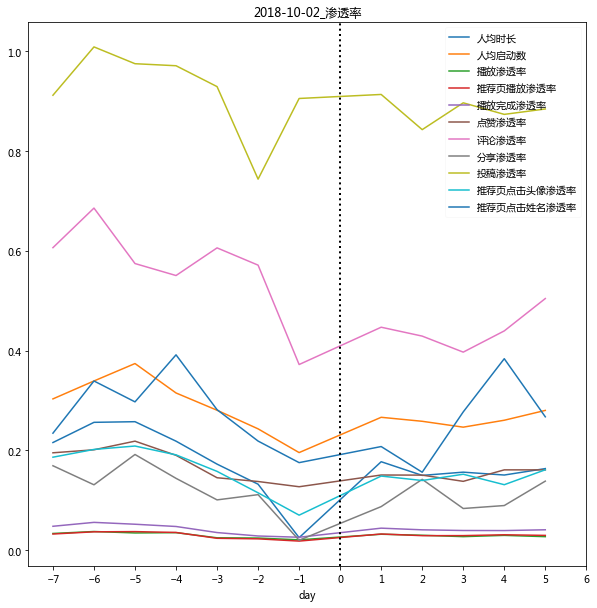

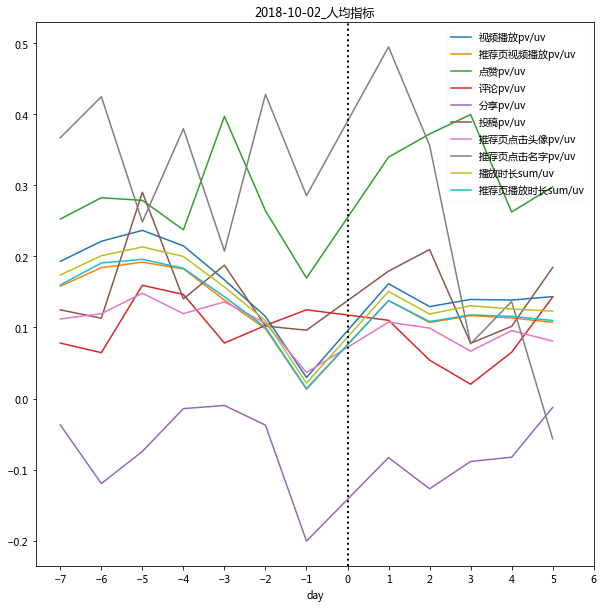

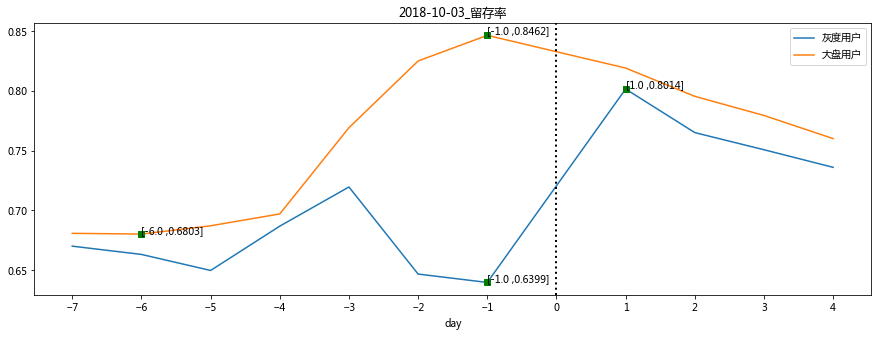

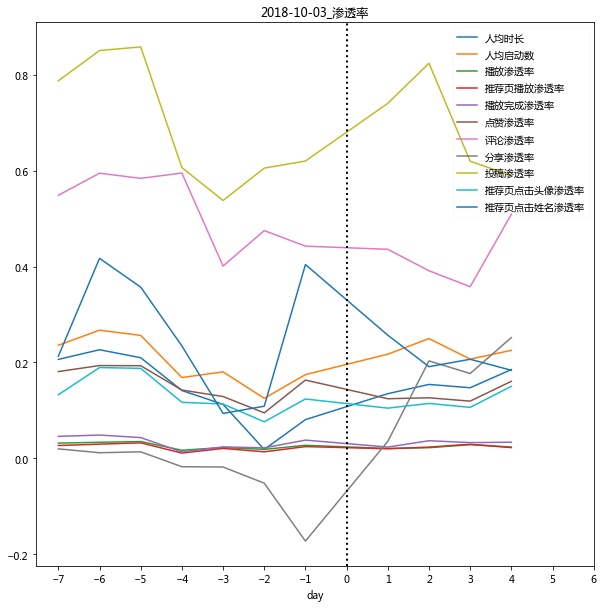

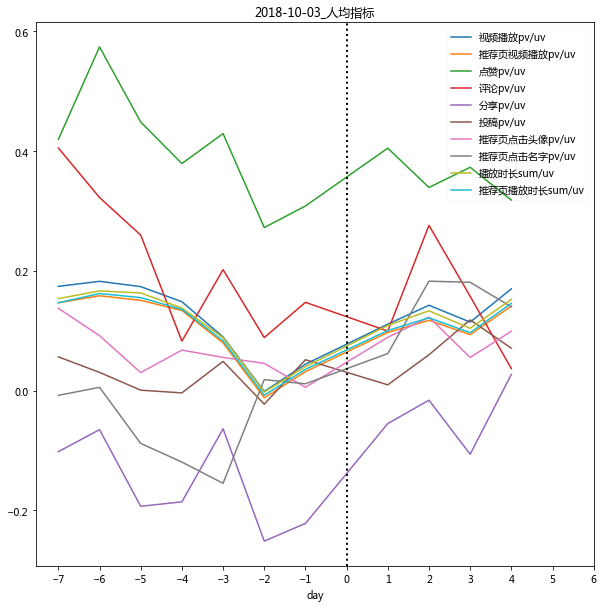

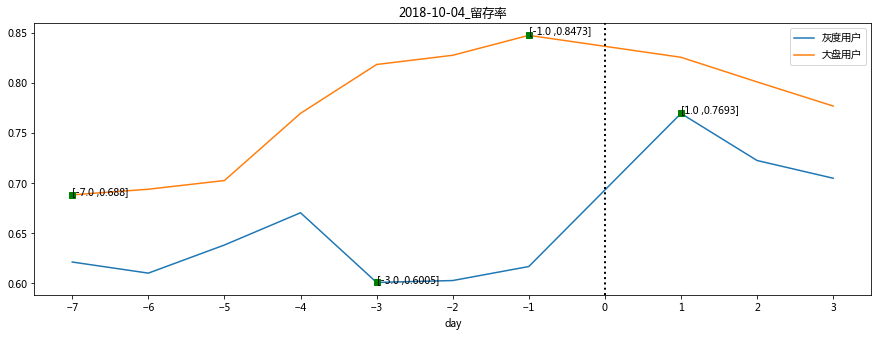

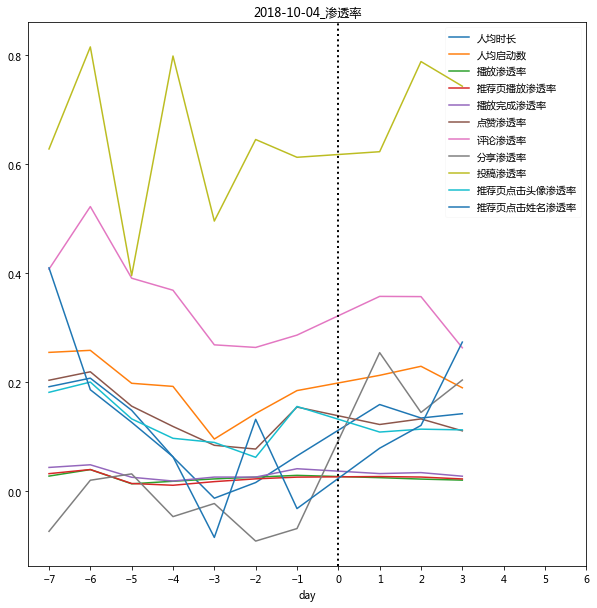

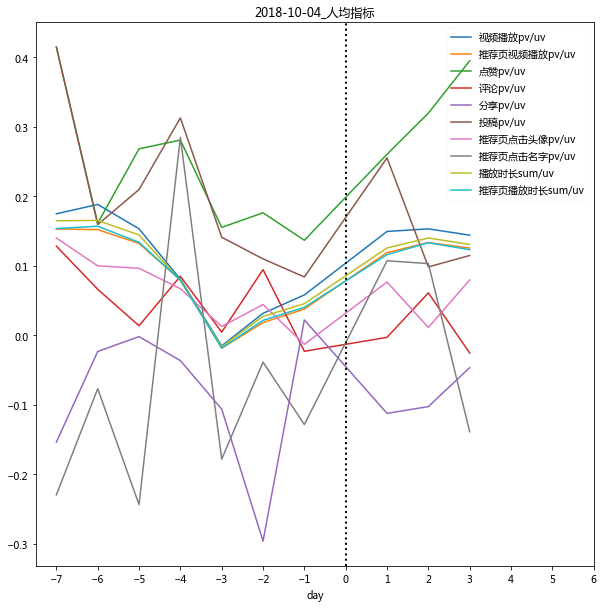

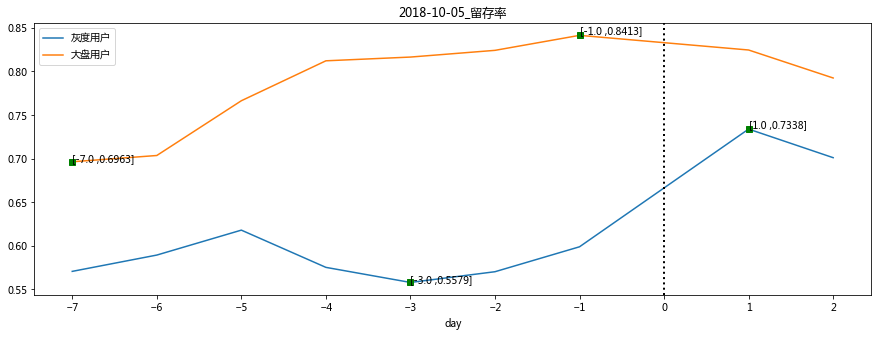

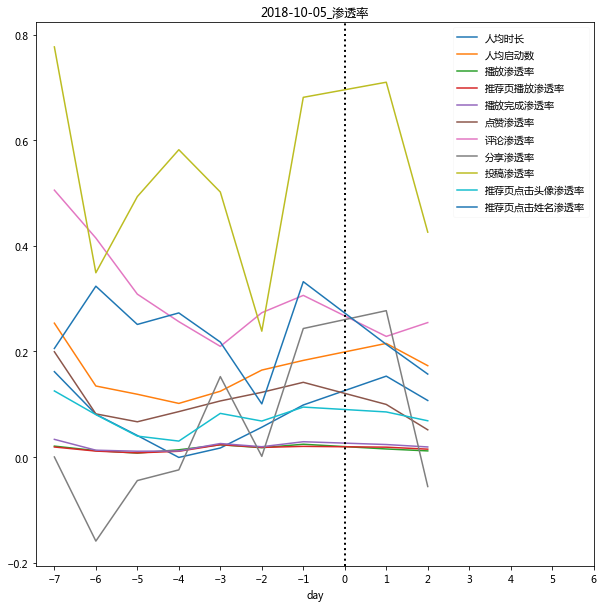

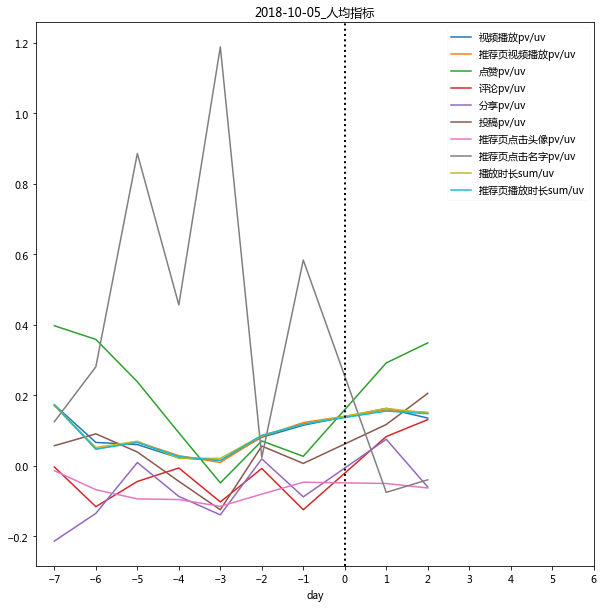

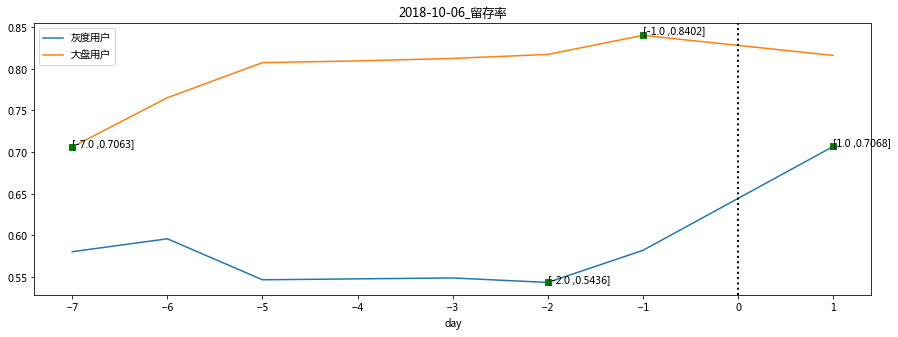

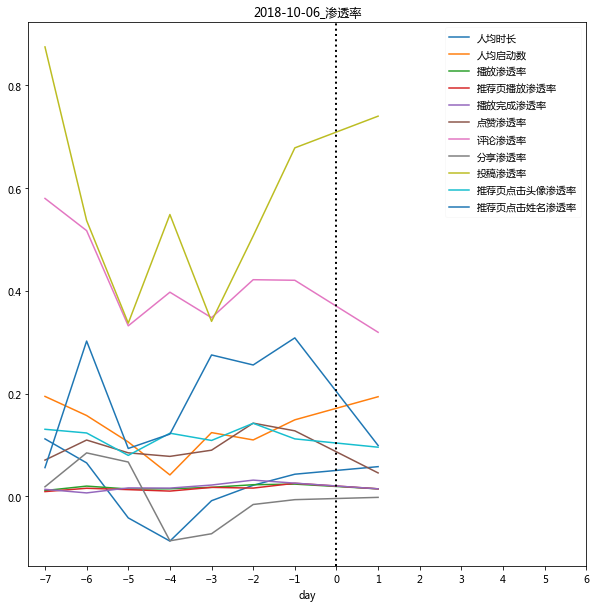

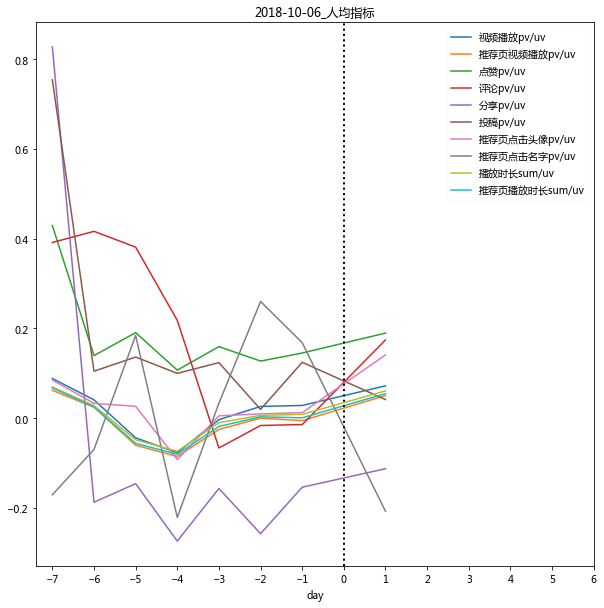

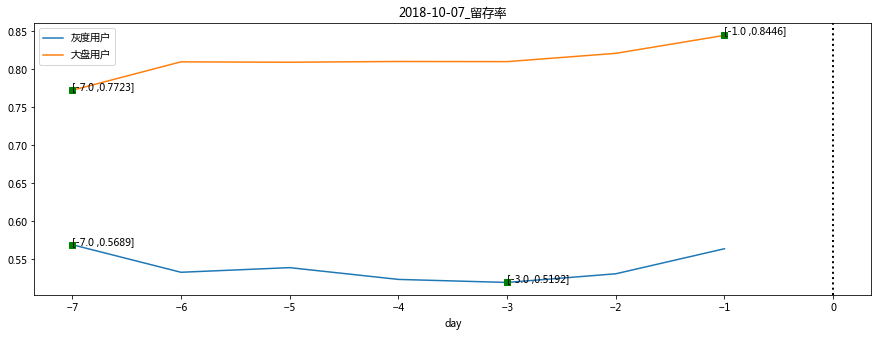

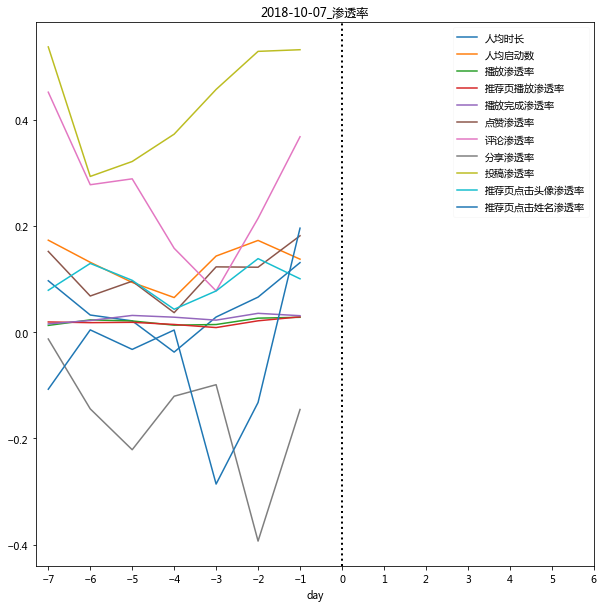

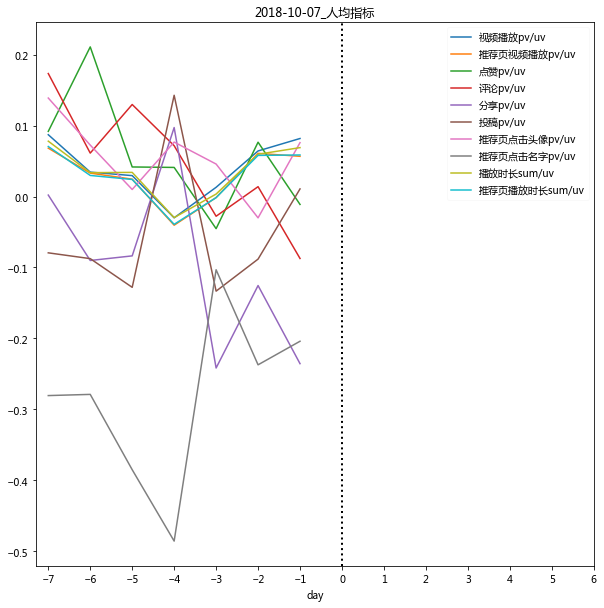

In [14]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
# import importlib
# importlib.reload(sys)
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['AR PL KaitiM GB']})

import os
import os.path
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

grey = pd.read_csv('greyDate.csv')
date = grey['update_date']
dates = sorted(date)
old = pd.read_csv('greyDate_old.csv')
dates_old = old['update_date'] 
# 按照下面的要求修改文档名字 greyDate为灰度数据集
greyDate = 'greyDate.csv'
greyDate_old = 'greyDate_old.csv'
output_remain = 'grey_remain.csv'
output_penetration = 'grey_penetration.csv'
output_active_level = 'grey_active_level.csv'

output_remain_single = 'grey_remain_single.csv'
output_penetration_single = 'grey_penetration_single.csv'
output_active_level_single = 'grey_active_level_single.csv'


dir_path = []
file_path = []

# 输入一灰日期or对应不看的灰度数据
delete_date = []
for i in dates:
    if i not in delete_date:
        path = os.getcwd()
        if i not in file_path:
            file_path.append(i)
            dir_name = i
            os.mkdir(dir_name)

            grey_f = grey[grey['update_date'].str.contains(i)]
            grey_f.to_csv(path+'/'+i +'/'+i + '_grey' +'.csv')

            old_f = old[old['update_date'].str.contains(i)]
            old_f.to_csv(path+'/'+i +'/'+i + '_old' + '.csv')
        tmp = path+'/'+i
        if tmp not in dir_path:
            dir_path.append(tmp)
print("数据切割完毕")        

def penetration(file):
    df_ori = pd.read_csv(file)
    selected_columns = df_ori.columns.drop('dlu_date')
    # print selected_columns
    aggregated_columns = selected_columns.drop('day')
    # print aggregated_columns
    table = pd.pivot_table(df_ori[selected_columns], values=aggregated_columns, index=['day'], aggfunc=np.sum)
    # print 'table:', table
    df_key_index = pd.DataFrame(index=table.index)
    for column_name in ['session_duration',
                        'session_count',
                        'video_play_uv',
                        'video_play_homepage_hot_uv',
                        'video_play_finish_uv',
                        'like_video_uv',
                        'comment_video_uv',
                        'share_video_uv',
                        'publish_start_uv',
                        'head_homepage_hot_uv',
                        'name_homepage_hot_uv',
                        ]:
        df = table[column_name] / table['user_count']
        df_key_index = pd.concat([df_key_index, df], axis=1, sort=False)
    df_key_index.columns = ['人均时长',
                            '人均启动数',
                            '播放渗透率',
                            '推荐页播放渗透率',
                            '播放完成渗透率',
                            '点赞渗透率',
                            '评论渗透率',
                            '分享渗透率',
                            '投稿渗透率',
                            '推荐页点击头像渗透率',
                            '推荐页点击姓名渗透率'
                            ]
    # print df_key_index
    return df_key_index
def get_key_index_active_level(file):
        df_ori_a = pd.read_csv(file)
        selected_columns_a = df_ori_a.columns.drop('update_date').drop('dlu_date')
        aggregated_columns_a = selected_columns_a.drop('day')
        table_a = pd.pivot_table(df_ori_a[selected_columns_a], values=aggregated_columns_a, index=['day'], aggfunc=np.sum)

        df_key_index_a = pd.DataFrame(index=table_a.index)
        for column_name, column_name_uv in zip(
                ['video_play',
                 'video_play_homepage_hot',
                 'like_video',
                 'comment_video',
                 'share_video',
                 'publish_start',
                 'head_homepage_hot',
                 'name_homepage_hot',
                 'play_time',
                 'play_time_homepage_hot'
                 ],
                ['video_play_uv',
                 'video_play_homepage_hot_uv',
                 'like_video_uv',
                 'comment_video_uv',
                 'share_video_uv',
                 'publish_start_uv',
                 'head_homepage_hot_uv',
                 'name_homepage_hot_uv',
                 'play_time_uv',
                 'play_time_homepage_hot_uv'
                 ]):
            df = table_a[column_name] / table_a[column_name_uv]
            df_key_index_a = pd.concat([df_key_index_a, df], axis=1, sort=False)
        df_key_index_a.columns = ['视频播放pv/uv',
                                '推荐页视频播放pv/uv',
                                '点赞pv/uv',
                                '评论pv/uv',
                                '分享pv/uv',
                                '投稿pv/uv',
                                '推荐页点击头像pv/uv',
                                '推荐页点击名字pv/uv',
                                '播放时长sum/uv',
                                '推荐页播放时长sum/uv'
                                ]
        return df_key_index_a
def compare_relative_difference(index_grey, index_old):
        df_relative_difference = pd.DataFrame(index=index_grey.index)
        for column_name in index_grey.columns:
            df = (index_grey[column_name] - index_old[column_name]) / index_old[column_name]
            df_relative_difference = pd.concat([df_relative_difference, df], axis=1, sort=False)
        return df_relative_difference.drop([0])
def get_remain_rate(file):
    df_ori = pd.read_csv(file)
    df_selected = df_ori[['update_date','day','user_count']]
    table = pd.pivot_table(df_selected, values = ['user_count'], index=['day'], columns = ['update_date'], aggfunc=np.sum)
    df_remain_rate = pd.DataFrame(index = table.index)
    row_day0 = table.loc[[0]]
    for i in table.index:
        row = table.loc[[i]]
        row = row[row.columns[~row.isnull().all()]]
        day0 = row_day0[row.columns]
        a = sum(row.values[0])
        b = sum(day0.values[0])
        remain_rate = format(float(a)/float(b),'.4f')
        remain_rate=float(remain_rate)
        df_remain_rate.loc[i,0] = remain_rate
    return df_remain_rate.drop([0])

# 留存率
def demo_test(a):
    min_index = a.idxmin()
    max_index = a.idxmax()
    plt.plot(min_index,a[min_index],'gs')
    plt.plot(max_index,a[max_index],'gs')

    show_max = '['+str(max_index)+' ,'+str(a[max_index])+']'
    plt.annotate(show_max,xytext=(max_index,a[max_index]),xy=(max_index,a[max_index].round(2)))
    show_min = '['+str(min_index)+' ,'+str(a[min_index])+']'
    plt.annotate(show_min,xytext=(min_index,a[min_index]),xy=(min_index,a[min_index].round(2)))
remain_grey = get_remain_rate(greyDate)
remain_old = get_remain_rate(greyDate_old)
remain_difference = pd.concat([remain_grey, remain_old], axis=1)
remain_difference.columns = ['灰度用户','大盘用户']
remain_difference.to_csv(output_remain, encoding = 'utf_8')
remain_difference.plot(figsize=(15,5),title=u'留存率')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)

for idx in ['灰度用户','大盘用户']:
    demo_test(remain_difference[idx])
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
plt.savefig("留存率.png")
# 渗透率
grey_penetration = penetration(greyDate)
old_penetration = penetration(greyDate_old)
relative_difference_penetration = compare_relative_difference(grey_penetration, old_penetration)
relative_difference_penetration.to_csv(output_penetration, encoding='utf_8')

relative_difference_penetration.plot(figsize=(10,10),title=u'渗透率')
legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_alpha(0.1)
frame.set_facecolor('none')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
plt.savefig("渗透率.png")
# 人均指标
index_grey_active_level = get_key_index_active_level(greyDate)
index_old_active_level = get_key_index_active_level(greyDate_old)
relative_difference_active_level = compare_relative_difference(index_grey_active_level, index_old_active_level)
relative_difference_active_level.to_csv(output_active_level, encoding='utf_8')
relative_difference_active_level.plot(figsize=(10,10),title=u'人均指标')
legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_alpha(0.1)
frame.set_facecolor('none')
my_x_ticks = np.arange(-7, 7, 1)
plt.xticks(my_x_ticks)
l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
plt.savefig("人均指标.png")

print("指标计算完毕")
# 依照进组日期拆分-留存率/渗透率/人均指标
for index in dir_path:
        pth = index.split('/')
        file_grey = index +'/'+ pth[-1] +'_grey' + '.csv'
        file_old =  index +'/'+ pth[-1] + '_old' + '.csv'
        output_penetration = index +'/'+ pth[-1] + '_grey_test_penetration.csv'
        output_active_level = index +'/'+ pth[-1] +'_grey_test_active_level.csv'
        output_remain = index +'/'+ pth[-1] +'_grey_test_remain.csv'


        remain_grey = get_remain_rate(file_grey)
        remain_old = get_remain_rate(file_old)
        remain_difference = pd.concat([remain_grey, remain_old], axis=1, sort=False)
        remain_difference.columns = ['灰度用户', '大盘用户']
        remain_difference.to_csv(output_remain_single, mode='a', header=True, encoding='utf_8')
        remain_difference.to_csv(output_remain, encoding='utf_8')
        remain_difference.plot(figsize=(15,5),title= pth[-1]+"_"+u'留存率')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        for idx in ['灰度用户','大盘用户']:
            demo_test(remain_difference[idx])
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
        plt.savefig(pth[-1]+"_"+"remain_rate.png")


        grey_penetration = penetration(file_grey)
        old_penetration = penetration(file_old)
        relative_difference_penetration = compare_relative_difference(grey_penetration, old_penetration)
        relative_difference_penetration.to_csv(output_penetration, encoding='utf_8')
        relative_difference_penetration.to_csv(output_penetration_single, mode='a', header=True, encoding='utf_8')
        relative_difference_penetration.plot(figsize=(10,10),title=pth[-1]+u"_"'渗透率')
        legend = plt.legend(loc='upper right')
        frame = legend.get_frame()
        frame.set_alpha(0.1)
        frame.set_facecolor('none')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
        plt.savefig(pth[-1]+"_""penetra_rate.png", transparent=True)

        index_grey_active_level = get_key_index_active_level(file_grey)
        index_old_active_level = get_key_index_active_level(file_old)
        relative_difference_active_level = compare_relative_difference(index_grey_active_level, index_old_active_level)
        relative_difference_active_level.to_csv(output_active_level_single, mode='a', header=True, encoding='utf_8')
        relative_difference_active_level.to_csv(output_active_level, encoding='utf_8')
        relative_difference_active_level.plot(figsize=(10,10),title=pth[-1]+"_"+u'人均指标')
        legend = plt.legend(loc='upper right')
        frame = legend.get_frame()
        frame.set_alpha(0.1)
        frame.set_facecolor('none')
        my_x_ticks = np.arange(-7, 7, 1)
        plt.xticks(my_x_ticks)
        l = plt.axvline(x=0,linewidth=2,ls='dotted', color='k')
        plt.savefig(pth[-1]+"_"+"pvuv_rate.png")


'''
import pandas
d = pandas.read_csv('d1828.csv')
d1118=d[d['update_date'].str.contains(r'2018-07-17')]
d1118.to_csv('d1118.csv')
'''


from docx import Document
from docx.shared import Inches

grey = pd.read_csv('greyDate.csv')
date = grey['update_date']
dates = sorted(date)

document = Document()
document.add_heading(u'安卓发版', 0)

p = document.add_paragraph(u'灰度日期： ')
p.add_run(dates[0]).bold = True
p.add_run(u'到 ')
length = len(dates)
p.add_run(dates[length-1]).bold = True

document.add_heading(u'留存率', level=1)
document.add_picture(u'留存率.png', width=Inches(6.25))
document.add_paragraph(u'依照进组日期拆分', style='List Number')
pics = []
names = ['remain_rate']
for i in dates:
    for name in names:
        f = str(i)+"_"+name+".png"
        if f not in pics:
            pics.append(f)
for p in pics:
    _p = str(p)
    # 2018-10-07_留存率.png
    # print(_p)
    document.add_picture(_p, width=Inches(6.25))

document.add_page_break()
document.add_heading(u'渗透率', level=1)
document.add_picture(u'渗透率.png', width=Inches(6.25))
document.add_paragraph(u'依照进组日期拆分', style='List Number')
# p.add_run(u'进组日期').bold = True
pics = []
names = ['penetra_rate']
for i in dates:
    for name in names:
        f = str(i)+"_"+name+".png"
        if f not in pics:
            pics.append(f)
for p in pics:
    _p = str(p)
    # print(_p)
    document.add_picture(_p, width=Inches(6.25))

document.add_page_break()
document.add_heading(u'人均指标', level=1)
document.add_picture(u'人均指标.png', width=Inches(6.25))
document.add_paragraph(u'依照进组日期拆分-人均pvuv', style='List Number')
pics = []
names = ['pvuv_rate']
for i in dates:
    for name in names:
        f = str(i)+"_"+name+".png"
        if f not in pics:
            pics.append(f)
for p in pics:
    _p = str(p)
    # print(_p)
    document.add_picture(_p, width=Inches(6.25))

document.add_heading(u'数据拆分完毕', level=1)
document.save(u'安卓发版.docx')
print("文档生成完毕")

In [12]:
# ! env